              Dim1      Dim2
Sample1   0.585550  0.358714
Sample2  -0.387422  0.548552
Sample3   0.489142  0.794448
Sample4  -0.005143  0.236392
Sample5  -0.061743 -0.242108
Sample6   0.377098 -0.336558
Sample7  -0.573919 -0.671101
Sample8  -0.070265 -0.543304
Sample9  -0.601095  0.016204
Sample10  0.247798 -0.161240
Index(['Sample1', 'Sample2', 'Sample3', 'Sample4', 'Sample5', 'Sample6',
       'Sample7', 'Sample8', 'Sample9', 'Sample10'],
      dtype='object')


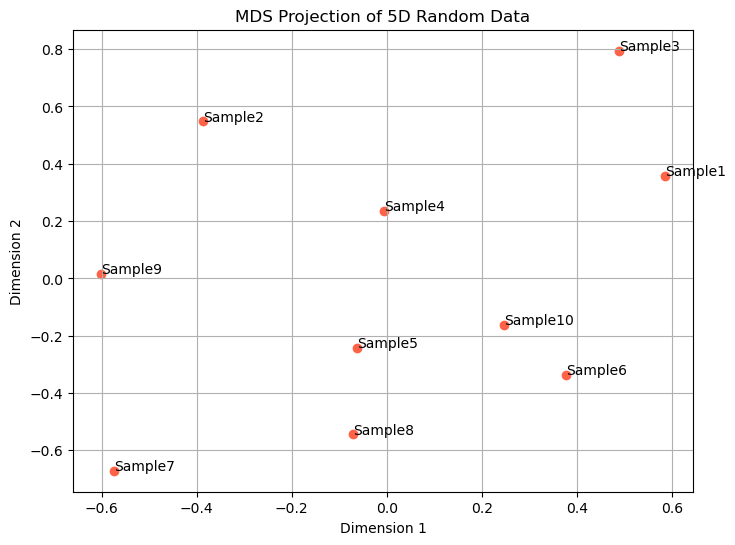

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances


np.random.seed(42)
data = np.random.rand(10, 5)  # 10 samples, 5 features
labels = ['Sample' + str(i) for i in range(1, 11)]
data=pd.DataFrame(data,columns=['wt'+str(i) for i in range(1,6)],index=labels)


# Step 2: Compute pairwise Euclidean distances (you can also use cosine or others)
dist_matrix = pairwise_distances(data, metric='euclidean')


# Step 3: Apply MDS to reduce to 2D
mds = MDS(dissimilarity='precomputed')
mds_coords = mds.fit_transform(dist_matrix)


# Step 4: Put results into a DataFrame for easy plotting
mds_df = pd.DataFrame(mds_coords, columns=['Dim1', 'Dim2'], index=labels)
print(mds_df)
print(mds_df.index)

# Step 5: Plot
plt.figure(figsize=(8, 6))
plt.scatter(mds_df['Dim1'], mds_df['Dim2'], color='tomato')

for label in mds_df.index:
    plt.annotate(label, (mds_df.loc[label, 'Dim1'], mds_df.loc[label, 'Dim2']))

plt.title('MDS Projection of 5D Random Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()
